# Load Trained Q and Policy

In [35]:
import pickle

agent_name = "MCES2"

with open(f"agent_{agent_name}_policy.pkl", "rb") as f:
    policy = pickle.load(f)
with open(f"agent_{agent_name}_Q.pkl", "rb") as f:
    Q = pickle.load(f)

# for s, a in Q:
#     print(f"State: {s}, Action: {a}, Q-value: {Q[(s, a)]}")

# for s in policy:
#     print(f"State: {s}, Action: {policy[s]}")

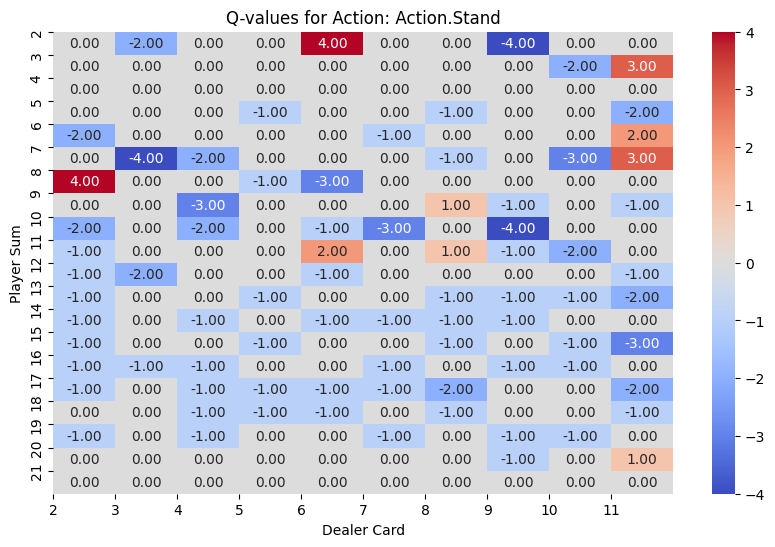

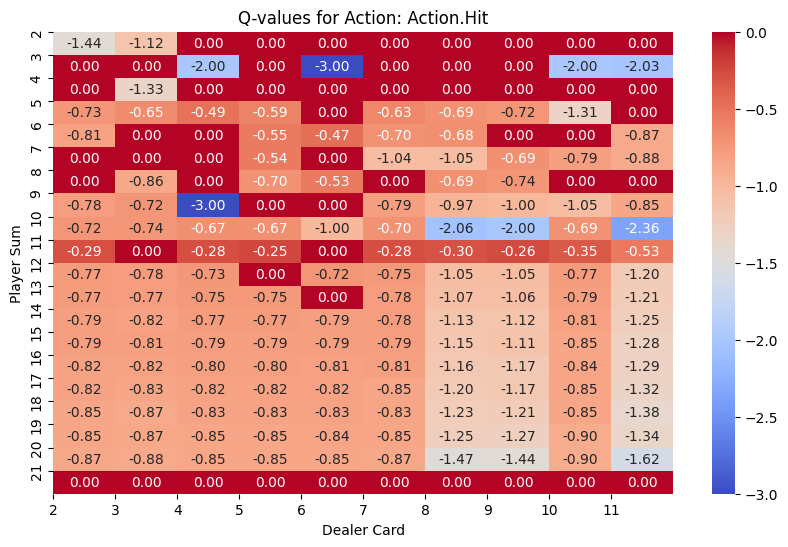

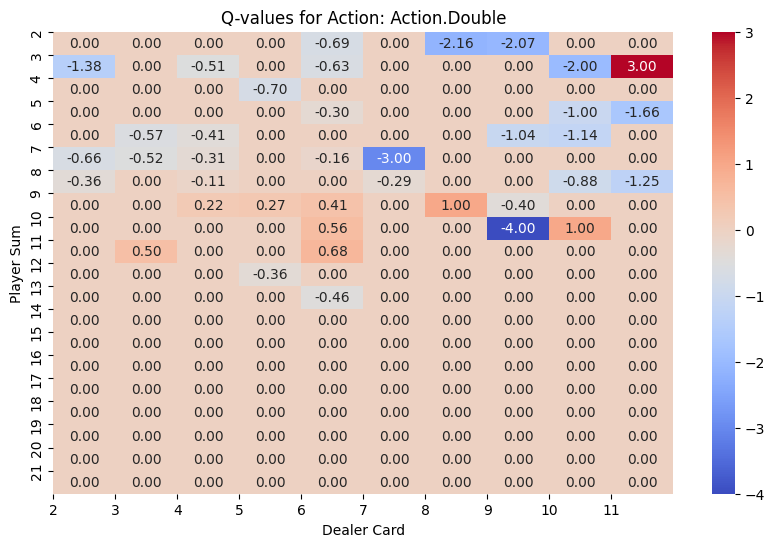

In [38]:
from models.utils import BaseState, Action
import numpy as np
# plotting
import matplotlib.pyplot as plt
import seaborn as sns
# split q a tables
player_sums = range(2, 22)  # player sums from 2 to 21
dealer_cards = range(2, 12)

# action tables
action_tables = {}
for action in [Action.Stand, Action.Hit, Action.Double]:
    action_tables[action] = np.zeros((len(player_sums), len(dealer_cards)))
    for i, player_sum in enumerate(player_sums):
        for j, dealer_card_value in enumerate(dealer_cards):
            state = BaseState(
                player_sum=player_sum,
                dealer_card=dealer_card_value,
                usible_ace=False,
                splitable=False
            )
            if (state, action) in Q:
                action_tables[action][i, j] = Q[(state, action)]


for action, table in action_tables.items():
    plt.figure(figsize=(10, 6))
    # plt.imshow(table, cmap='hot', interpolation='nearest')
    sns.heatmap(table, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, 
                xticklabels=dealer_cards, yticklabels=player_sums)
    # plt.colorbar(label='Q-value')
    plt.title(f'Q-values for Action: {action}')
    plt.xlabel('Dealer Card')
    plt.ylabel('Player Sum')
    plt.xticks(ticks=np.arange(len(dealer_cards)), labels=dealer_cards)
    plt.yticks(ticks=np.arange(len(player_sums)), labels=player_sums)
    plt.show()


# Show Optimal Policy
## Split Policy

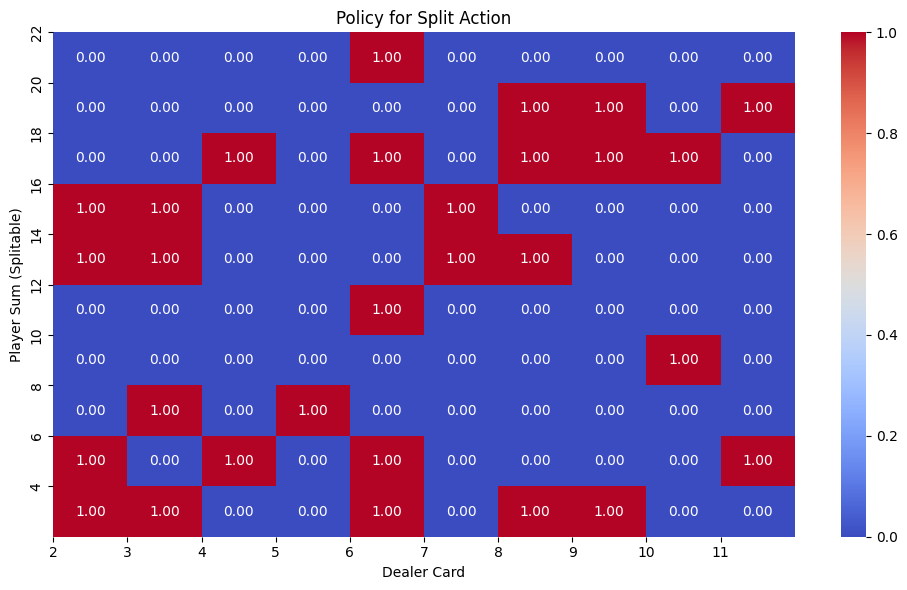

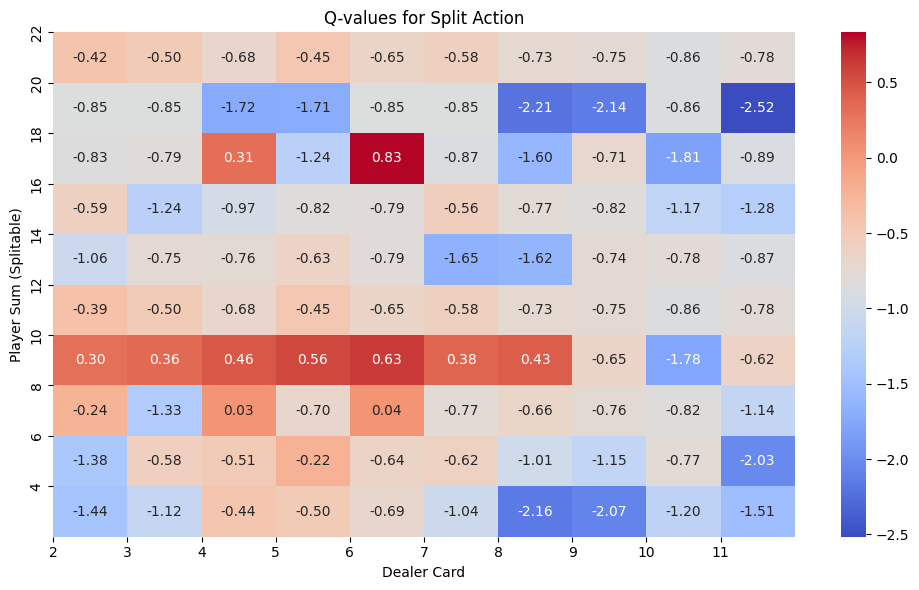

In [39]:
# split situation
splitable_player_sums = range(22, 2, -2)  # only
# reduce to even sums for splitable player sums
dealer_cards = range(2, 12)

split_policy = np.zeros((len(splitable_player_sums), len(dealer_cards)))
split_policy_values = np.zeros((len(splitable_player_sums), len(dealer_cards)))
for i, player_sum in enumerate(splitable_player_sums):
    for j, dealer_card_value in enumerate(dealer_cards):
        has_ace = False
        if player_sum == 22:
            # player has a usable ace
            has_ace = True
            player_sum = 12
        state = BaseState(
            player_sum=player_sum,
            dealer_card=dealer_card_value,
            usible_ace=has_ace,
            splitable=True
        )
        action  = policy.get(state)
        split_policy[i, j] = action == Action.Split
        split_policy_values[i, j] = Q.get((state, action))

plt.figure(figsize=(10, 6))
ax = sns.heatmap(split_policy, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, 
            xticklabels=dealer_cards, yticklabels=splitable_player_sums)

plt.title('Policy for Split Action')
plt.xlabel('Dealer Card')
plt.ylabel('Player Sum (Splitable)')
plt.xticks(ticks=np.arange(len(dealer_cards)), labels=dealer_cards)
plt.yticks(ticks=np.arange(len(splitable_player_sums)), labels=splitable_player_sums)
plt.tight_layout()

plt.figure(figsize=(10, 6))
sns.heatmap(split_policy_values, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, 
            xticklabels=dealer_cards, yticklabels=splitable_player_sums)
plt.title('Q-values for Split Action')
plt.xlabel('Dealer Card')
plt.ylabel('Player Sum (Splitable)')
plt.xticks(ticks=np.arange(len(dealer_cards)), labels=dealer_cards)
plt.yticks(ticks=np.arange(len(splitable_player_sums)), labels=splitable_player_sums)
plt.tight_layout()

plt.show()
        